<a href="https://colab.research.google.com/github/Rishal14/-Research-Paper-Summary-Project/blob/main/Noise_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy matplotlib scipy


   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
    --------------------------------------- 0.5/41.0 MB 2.0 MB/s eta 0:00:21
    --------------------------------------- 0.8/41.0 MB 1.7 MB/s eta 0:00:24
   - -------------------------------------- 1.0/41.0 MB 1.5 MB/s eta 0:00:27
   - -------------------------------------- 1.6/41.0 MB 1.5 MB/s eta 0:00:27
   -- ------------------------------------- 2.1/41.0 MB 1.7 MB/s eta 0:00:23
   -- ------------------------------------- 2.6/41.0 MB 1.9 MB/s eta 0:00:21
   --- ------------------------------------ 3.1/41.0 MB 2.1 MB/s eta 0:00:19
   ---- ----------------------------------- 4.2/41.0 MB 2.3 MB/s eta 0:00:16
   ---- ----------------------------------- 4.7/41.0 MB 2.4 MB/s eta 0:00:16
   ----- ---------------------------------- 5.8/41.0 MB 2.6 MB/s eta 0:00:14
   ------ ----------

In [ ]:
!pip install skimage


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [3 lines of output]
  
  *** Please install the `scikit-image` package (instead of `skimage`) ***
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

Getting requirements to build wheel did not run successfully.
exit code: 1

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.9 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.9 MB 5.3 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.9 MB 5.6 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.9 MB 5.4 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.9 MB 5.1 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/12.9 MB 4.9 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.9 MB 4.8 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/12.9 MB 4.7 MB/s eta 0:00:02
   ------------------------- -------------- 8.1/12.9 MB 4.5 MB/s eta 0:00:02
   --------------------------- ------------ 8.9/12.9 MB 4.4 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.9 MB 4.2 MB/s eta 0:00:01
   ------------------------------- -------- 10.2/12.9 MB 4.2 MB/s eta 0:00:01
   --

Enter the path of the noisy image:  noisy_image.jpeg



Choose noise removal option:
1. Remove Salt and Pepper noise
2. Remove Periodic noise


Enter 1 or 2:  2


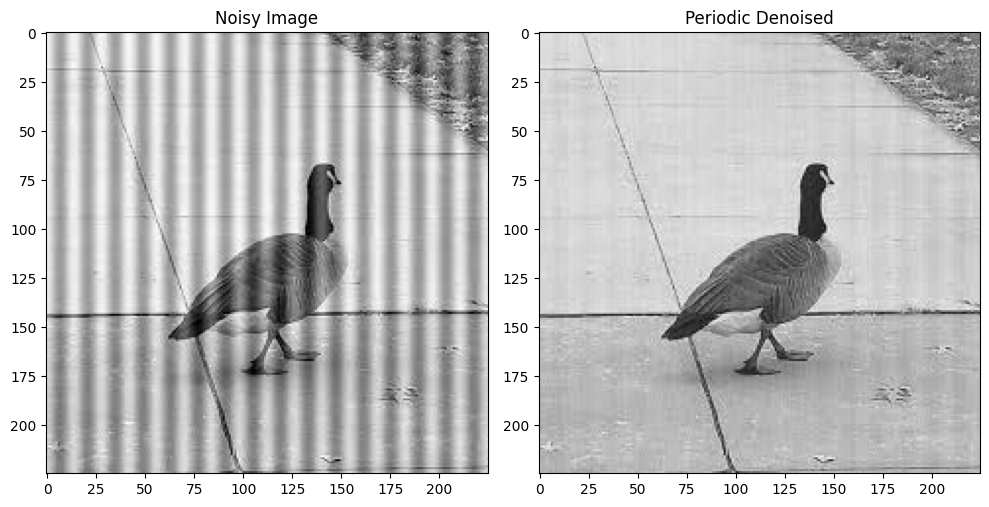

PSNR (Peak Signal-to-Noise Ratio): 18.61 dB
SSIM (Structural Similarity Index): 0.3244


In [ ]:
"""
Project: Image Denoising and Performance Evaluation

Description:
This project demonstrates the process of denoising an image and evaluating the quality of the denoised output.
The user is prompted to choose between two types of noise removal techniques:
1. Salt and Pepper Noise Removal using Median Blurring.
2. Periodic Noise Removal using Fourier Transform.

The quality of the denoised image is then assessed using two performance metrics:
- PSNR (Peak Signal-to-Noise Ratio): Measures the difference between the noisy and denoised images.
- SSIM (Structural Similarity Index): Measures the perceptual similarity between the noisy and denoised images.

The user is expected to provide the path to a noisy image, and the output will display the denoised image alongside performance metrics.

Dependencies:
- OpenCV
- NumPy
- Matplotlib
- scikit-image (for SSIM)

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Ask the user for the image path
image_path = input("Enter the path of the noisy image: ")

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Could not load image. Please check the path and try again.")
    exit()

# Ask the user what type of denoising to perform
print("\nChoose noise removal option:")
print("1. Remove Salt and Pepper noise")
print("2. Remove Periodic noise")
choice = input("Enter 1 or 2: ")

# Function to remove salt and pepper noise
def remove_sp_noise(image):
    return cv2.medianBlur(image, 3)

# Function to remove periodic noise
def remove_periodic_noise(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)
    log_magnitude = np.log1p(magnitude)

    threshold = np.percentile(log_magnitude, 99.9)
    mask = np.ones_like(fshift, dtype=np.uint8)
    mask[log_magnitude > threshold] = 0

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask[crow-10:crow+10, ccol-10:ccol+10] = 1

    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_denoised = np.fft.ifft2(f_ishift)
    return np.abs(img_denoised)

# Apply the selected noise removal method
if choice == '1':
    result = remove_sp_noise(img)
    title = "Salt & Pepper Denoised"
elif choice == '2':
    result = remove_periodic_noise(img)
    title = "Periodic Denoised"
else:
    print(" Invalid choice! Showing original image.")
    result = img
    title = "Original Image"

# Ensure both images are of the same type (uint8) and size
result = np.uint8(result)
img = np.uint8(img)

# Calculate PSNR (Peak Signal-to-Noise Ratio) between the noisy and denoised images
psnr_value = cv2.PSNR(img, result)

# Calculate SSIM (Structural Similarity Index) between the noisy and denoised images
ssim_value, _ = ssim(img, result, full=True)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Noisy Image')
plt.subplot(1, 2, 2), plt.imshow(result, cmap='gray'), plt.title(title)
plt.tight_layout()
plt.show()

# Print performance metrics
print(f"PSNR (Peak Signal-to-Noise Ratio): {psnr_value:.2f} dB")
print(f"SSIM (Structural Similarity Index): {ssim_value:.4f}")


Enter the path of the noisy image:  image4.png



Choose noise removal option:
1. Remove Salt and Pepper noise
2. Remove Periodic noise


Enter 1 or 2:  2


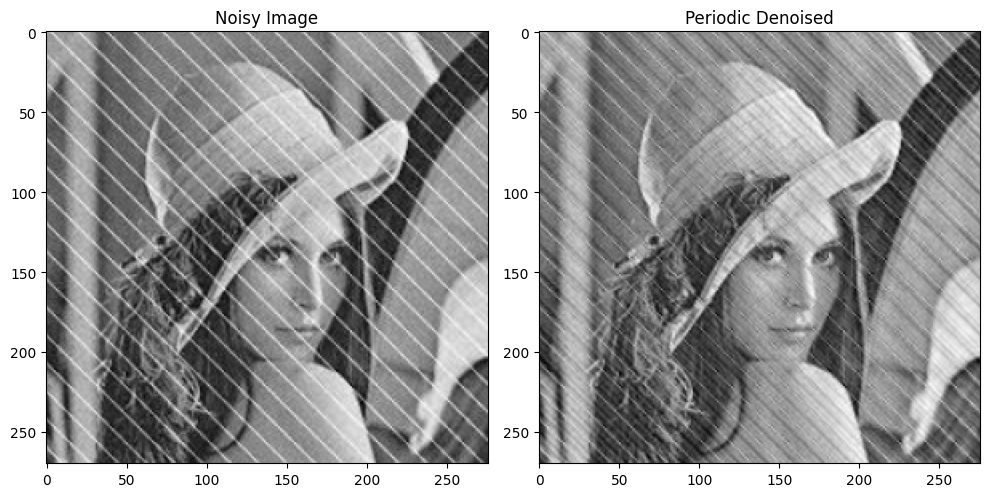

PSNR (Peak Signal-to-Noise Ratio): 24.39 dB
SSIM (Structural Similarity Index): 0.7185


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Ask the user for the image path
image_path = input("Enter the path of the noisy image: ")

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Could not load image. Please check the path and try again.")
    exit()

# Ask the user what type of denoising to perform
print("\nChoose noise removal option:")
print("1. Remove Salt and Pepper noise")
print("2. Remove Periodic noise")
choice = input("Enter 1 or 2: ")

# Function to remove salt and pepper noise
def remove_sp_noise(image):
    return cv2.medianBlur(image, 3)

# Function to remove periodic noise
def remove_periodic_noise(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)
    log_magnitude = np.log1p(magnitude)

    threshold = np.percentile(log_magnitude, 99.9)
    mask = np.ones_like(fshift, dtype=np.uint8)
    mask[log_magnitude > threshold] = 0

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask[crow-10:crow+10, ccol-10:ccol+10] = 1

    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_denoised = np.fft.ifft2(f_ishift)
    return np.abs(img_denoised)

# Apply the selected noise removal method
if choice == '1':
    result = remove_sp_noise(img)
    title = "Salt & Pepper Denoised"
elif choice == '2':
    result = remove_periodic_noise(img)
    title = "Periodic Denoised"
else:
    print(" Invalid choice! Showing original image.")
    result = img
    title = "Original Image"

# Ensure both images are of the same type (uint8) and size
result = np.uint8(result)
img = np.uint8(img)

# Calculate PSNR (Peak Signal-to-Noise Ratio) between the noisy and denoised images
psnr_value = cv2.PSNR(img, result)

# Calculate SSIM (Structural Similarity Index) between the noisy and denoised images
ssim_value, _ = ssim(img, result, full=True)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Noisy Image')
plt.subplot(1, 2, 2), plt.imshow(result, cmap='gray'), plt.title(title)
plt.tight_layout()
plt.show()

# Print performance metrics
print(f"PSNR (Peak Signal-to-Noise Ratio): {psnr_value:.2f} dB")
print(f"SSIM (Structural Similarity Index): {ssim_value:.4f}")


Enter the path of the noisy image:  images.jpeg



Choose noise removal option:
1. Remove Salt and Pepper noise
2. Remove Periodic noise


Enter 1 or 2:  1


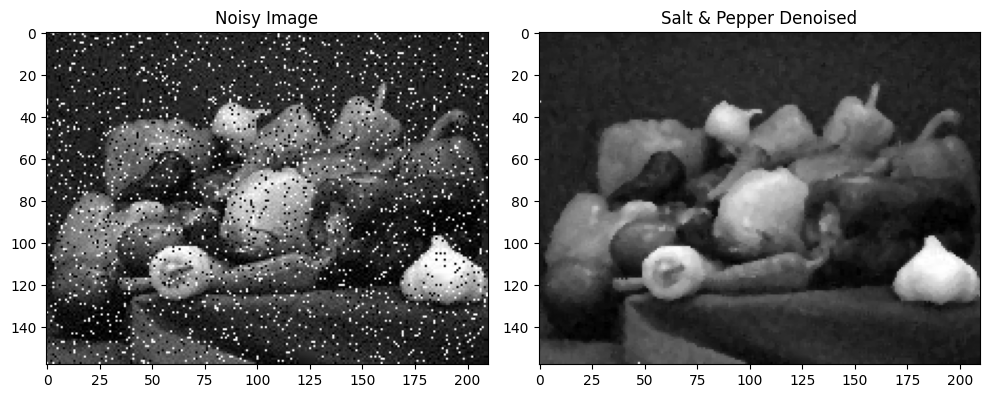

PSNR (Peak Signal-to-Noise Ratio): 14.61 dB
SSIM (Structural Similarity Index): 0.2345


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Ask the user for the image path
image_path = input("Enter the path of the noisy image: ")

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Could not load image. Please check the path and try again.")
    exit()

# Ask the user what type of denoising to perform
print("\nChoose noise removal option:")
print("1. Remove Salt and Pepper noise")
print("2. Remove Periodic noise")
choice = input("Enter 1 or 2: ")

# Function to remove salt and pepper noise
def remove_sp_noise(image):
    return cv2.medianBlur(image, 3)

# Function to remove periodic noise
def remove_periodic_noise(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)
    log_magnitude = np.log1p(magnitude)

    threshold = np.percentile(log_magnitude, 99.9)
    mask = np.ones_like(fshift, dtype=np.uint8)
    mask[log_magnitude > threshold] = 0

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask[crow-10:crow+10, ccol-10:ccol+10] = 1

    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_denoised = np.fft.ifft2(f_ishift)
    return np.abs(img_denoised)

# Apply the selected noise removal method
if choice == '1':
    result = remove_sp_noise(img)
    title = "Salt & Pepper Denoised"
elif choice == '2':
    result = remove_periodic_noise(img)
    title = "Periodic Denoised"
else:
    print(" Invalid choice! Showing original image.")
    result = img
    title = "Original Image"

# Ensure both images are of the same type (uint8) and size
result = np.uint8(result)
img = np.uint8(img)

# Calculate PSNR (Peak Signal-to-Noise Ratio) between the noisy and denoised images
psnr_value = cv2.PSNR(img, result)

# Calculate SSIM (Structural Similarity Index) between the noisy and denoised images
ssim_value, _ = ssim(img, result, full=True)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Noisy Image')
plt.subplot(1, 2, 2), plt.imshow(result, cmap='gray'), plt.title(title)
plt.tight_layout()
plt.show()

# Print performance metrics
print(f"PSNR (Peak Signal-to-Noise Ratio): {psnr_value:.2f} dB")
print(f"SSIM (Structural Similarity Index): {ssim_value:.4f}")


In [ ]:
!pip install opencv-python-headless scikit-image matplotlib numpy


Saving person101_bacteria_484.jpeg to person101_bacteria_484 (6).jpeg


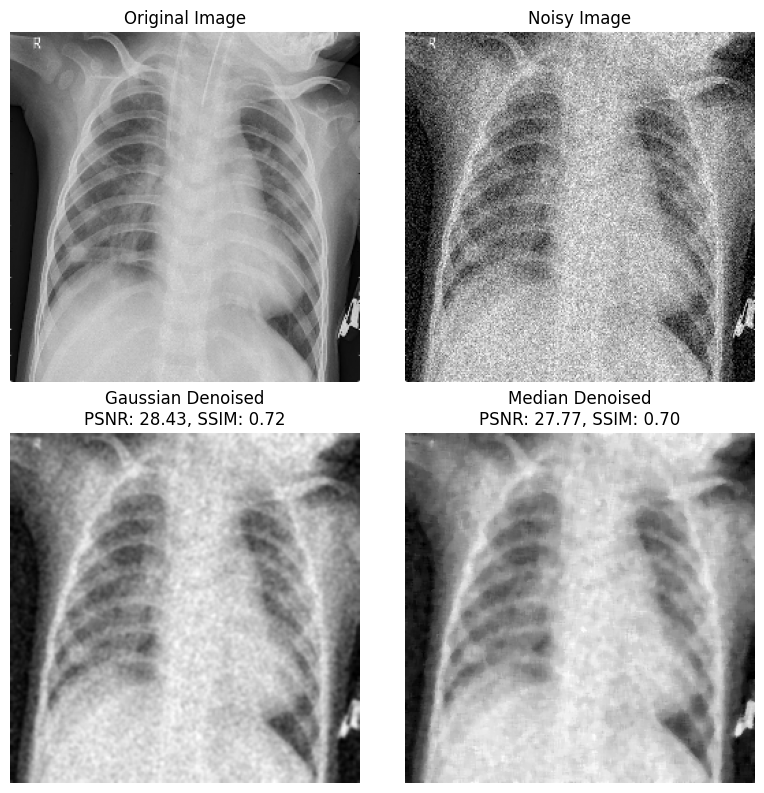

In [ ]:
# ✅ Install dependencies (Colab has them, but run just in case)
!pip install opencv-python-headless scikit-image --quiet

# ✅ Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# ✅ Upload a medical image (grayscale recommended)
from google.colab import files
uploaded = files.upload()

for file_name in uploaded:
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# ✅ Resize for consistency
img = cv2.resize(img, (256, 256))
img_float = img.astype(np.float32) / 255.0  # normalize to 0–1

# ✅ Add Gaussian Noise (correctly)
mean = 0
std_dev = 0.1
noise = np.random.normal(mean, std_dev, img_float.shape)
noisy_img = img_float + noise
noisy_img = np.clip(noisy_img, 0, 1)

# ✅ Apply Filters
gaussian_filtered = cv2.GaussianBlur(noisy_img, (5, 5), 0)
median_filtered = cv2.medianBlur((noisy_img * 255).astype(np.uint8), 5).astype(np.float32) / 255.0

# ✅ Evaluate Performance
psnr_g = psnr(img_float, gaussian_filtered, data_range=1.0)
ssim_g = ssim(img_float, gaussian_filtered, data_range=1.0)

psnr_m = psnr(img_float, median_filtered, data_range=1.0)
ssim_m = ssim(img_float, median_filtered, data_range=1.0)

# ✅ Display Results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_float, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title(f"Gaussian Denoised\nPSNR: {psnr_g:.2f}, SSIM: {ssim_g:.2f}")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(median_filtered, cmap='gray')
plt.title(f"Median Denoised\nPSNR: {psnr_m:.2f}, SSIM: {ssim_m:.2f}")
plt.axis('off')

plt.tight_layout()
plt.show()


Saving download (2).jpeg to download (2) (1).jpeg


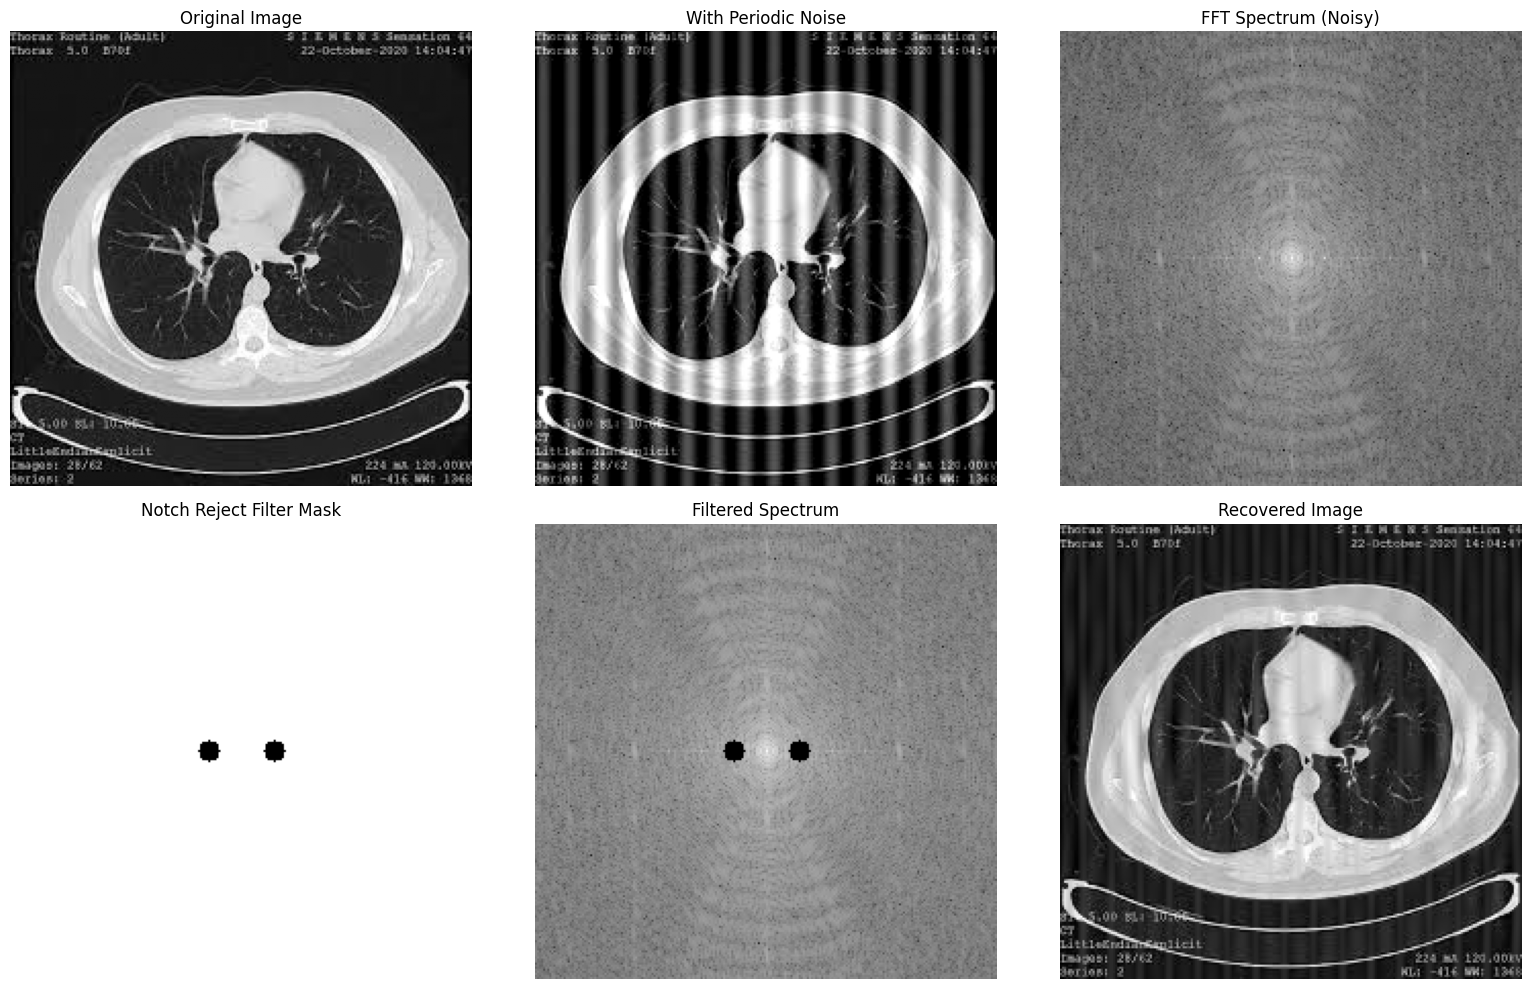

In [ ]:

from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = next(iter(uploaded))
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


rows, cols = image.shape
x = np.arange(rows)
y = np.arange(cols)
x, y = np.meshgrid(x, y, indexing='ij')


frequency = 16
amplitude = 50
periodic_noise = amplitude * np.sin(2 * np.pi * frequency * y / cols)

noisy_image = image + periodic_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

f = np.fft.fft2(noisy_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

def notch_reject_filter(shape, centers, radius=5):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), dtype=np.float32)
    for cx, cy in centers:
        for i in range(rows):
            for j in range(cols):
                if ((i - crow - cx)**2 + (j - ccol - cy)**2) <= radius**2 or \
                   ((i - crow + cx)**2 + (j - ccol + cy)**2) <= radius**2:
                    mask[i, j] = 0
    return mask

notch_centers = [(0, frequency), (0, -frequency)]
mask = notch_reject_filter(image.shape, notch_centers, radius=5)

fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
filtered_image = np.abs(img_back)
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)



